In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("phone_data.csv")

In [3]:
# Convert 'duration' column to numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

In [4]:
# Drop rows where duration is NaN
df = df.dropna(subset=['duration'])

In [5]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

In [6]:
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

In [7]:
# Filtering out the outliers
clean_df = df[(df['duration'] >= lower_whisker) & (df['duration'] <= upper_whisker)]

In [8]:
clean_df.to_csv("dataset_duration_outliers_removed.csv", index=False)

In [9]:
print("Original number of rows:", len(df))

Original number of rows: 830


In [10]:
print("Number of rows after removing outliers:", len(clean_df))

Number of rows after removing outliers: 696


In [11]:
print("Outliers removed:", len(df) - len(clean_df))

Outliers removed: 134


In [12]:
print("Lower Whisker:", lower_whisker)

Lower Whisker: -80.0


In [13]:
print("Upper Whisker:", upper_whisker)

Upper Whisker: 136.0


# Plot the BoxPlot and DistPlot post outlier removal. 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

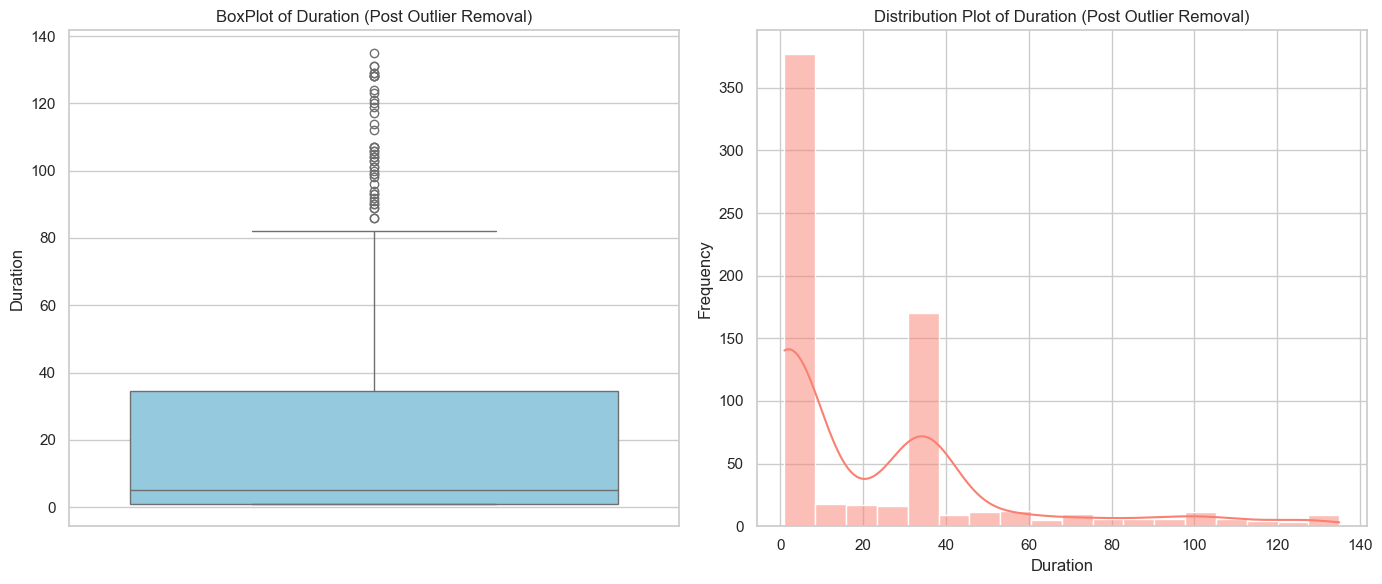

In [18]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(y=clean_df['duration'], ax=axes[0], color="skyblue")
axes[0].set_title("BoxPlot of Duration (Post Outlier Removal)")
axes[0].set_ylabel("Duration")

sns.histplot(clean_df['duration'], kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Distribution Plot of Duration (Post Outlier Removal)")
axes[1].set_xlabel("Duration")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Draw important inferences and conclusions from the created Plots and explain them as a Data Analyst.

- The BoxPlot shows most duration values tightly packed within the interquartile range (IQR), with outliers outside the whiskers.
- The DistPlot displays a smoother curve showing the overall shape of duration values.
- Most values are concentrated toward lower durations.

In [19]:
df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


# Give a Five-number summary of every column on the dataset

In [20]:
five_number_summary = clean_df.describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

In [21]:
five_number_summary = five_number_summary.transpose()

In [22]:
print("Five-number summary for each column:\n")
print(five_number_summary)

Five-number summary for each column:

          min     25%    50%      75%    max
index     0.0  209.75  410.5  616.250  829.0
duration  1.0    1.00    5.0   34.429  135.0
